<h1>Regression Tree Model to Predict Pension Funded Status</h1>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import pprint

<h1>Get 2014 data to train model</h1>

In [2]:
from get_clean_data_DTR import get_data, clean_data, get_feats, get_target

In [4]:
df = get_data(2014)

In [5]:
df_clean = clean_data(df,2014)

<h3>Features:</h3>
    <ul><li>Prior year funding target
        <li>Prior year target normal cost (expected growth in funding target)
        <li>Prior year benefits paid
        <li>Prior year effective interest rate (single effective rate that approximates the effect of 3-tiered rates actually used to value funding target
    </ul>

In [6]:
X = get_feats(df_clean, 2014)
y = get_target(df_clean, 2014)

<h1>Regression Tree - Trained on 2014 Data</h1>

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [8]:
dtr_depth2_14 = DecisionTreeRegressor(max_depth=2)
dtr_depth3_14 = DecisionTreeRegressor(max_depth=3)
dtr_depth4_14 = DecisionTreeRegressor(max_depth=4)

In [9]:
dtr_depth2_14.fit(X,y)
dtr_depth3_14.fit(X,y)
dtr_depth4_14.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [24]:
def plot_results(y_true, y_pred):
    plt.figure(figsize=(20,8))
    xx = np.linspace(0, len(y_true), num=len(y_true))
    plt.scatter(xx, y_true, s=20, edgecolor="black", c="darkorange", label="data")
    plt.plot(xx, y_pred, color="cornflowerblue", label="max_depth=4", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("Funding Target")
    plt.title("Predicting Funding Target from Decision Tree Regressor trained on 2014 data")
    plt.legend()
    plt.show()
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
    return

def plot_resid(y_true, y_pred):
    resid = y_true - y_pred

    plt.figure(figsize=(20,8))
    xx = np.linspace(0, len(y_true), num=len(y_true))
    plt.scatter(xx, resid, s=20, edgecolor="black", c="blue", label="residuals")
    plt.xlabel("data")
    plt.ylabel("residual")
    plt.title("Residuals of Predictions vs Actuals (Decision Tree Regressor Max Depth 4)")
    #plt.ylim(ymin=-.25,ymax=.25)
    plt.legend()
    plt.show()
    return

<h1>Test Regression Tree on 2015 data</h1>

In [11]:
df15 = get_data(2015)

In [12]:
df15_clean = clean_data(df15,2015)

In [13]:
X15 = get_feats(df15_clean,2015)
y15 = get_target(df15_clean,2015)

In [14]:
print('Regression Trees: \nMax Depth 2: {}\nMax Depth 3: {}\nMax Depth 4: {}'.format(dtr_depth2_14.score(X15,y15), dtr_depth3_14.score(X15,y15), dtr_depth4_14.score(X15,y15)))

Regression Trees: 
Max Depth 2: 0.857474146923643
Max Depth 3: 0.9047680788226563
Max Depth 4: 0.9373934218474099


In [15]:
y2_15 = dtr_depth2_14.predict(X15)
y3_15 = dtr_depth3_14.predict(X15)
y4_15 = dtr_depth4_14.predict(X15)

<h3>Plot results of model (max depth = 4) predictions (blue spikes) vs. actual values (red dots)</h3>

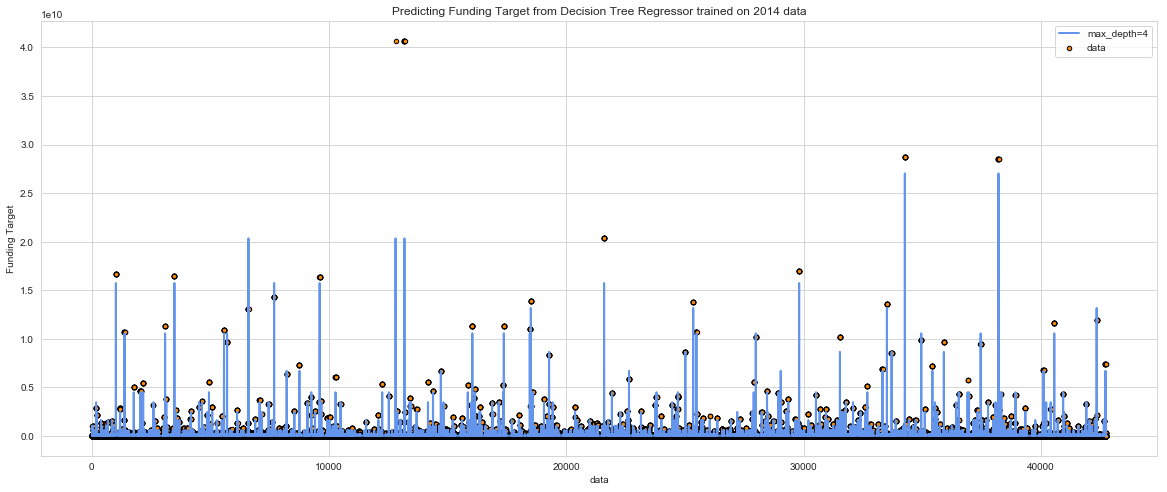

In [25]:
plot_results(y15,y4_15)

<h3>Plot residuals</h3>

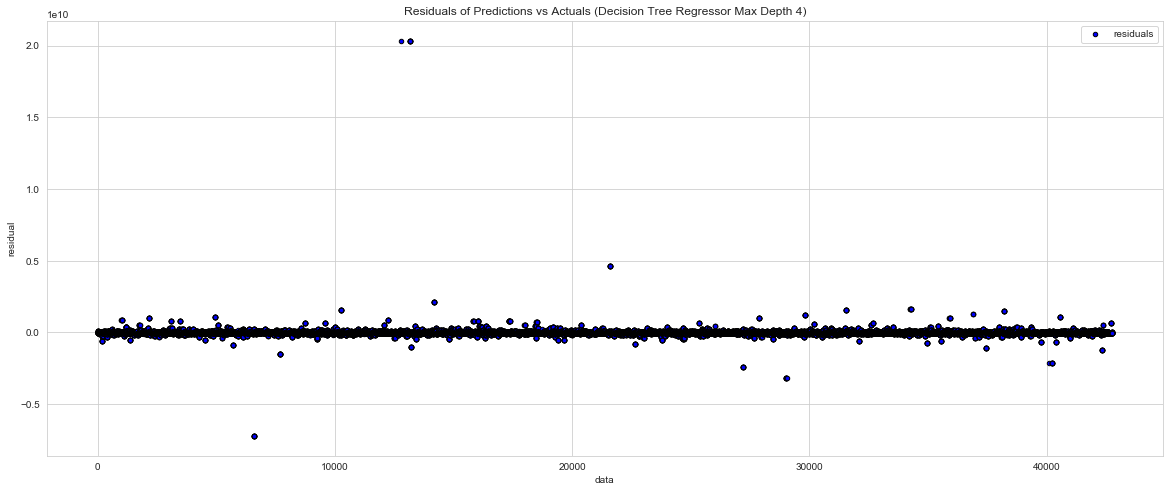

In [22]:
plot_resid(y15, y4_15)

In [30]:
tree.export_graphviz(dtr_depth4_14 ,out_file='dtr_depth4_14_15pred.dot') 

In [31]:
X15

,eir,part_cnt_2015,fndng_tgt_2015,tgt_nrml_cost_2015,pmts_to_part_2015
0,6.25,1681,107445427,800000.0,4845441.0
1,6.49,153,3407481,215988.0,410945.0
2,6.49,153,3407481,215988.0,410945.0
3,6.49,153,3407481,215988.0,410945.0
4,6.49,153,3407481,215988.0,410945.0
5,6.49,153,3407481,215988.0,410945.0
6,6.49,153,3407481,215988.0,410945.0
7,6.49,153,3407481,215988.0,410945.0
8,6.49,153,3407481,215988.0,410945.0
9,6.49,153,3407481,215988.0,410945.0


In [ ]:
dtr_depth4_14.feature_importances_

In [ ]:
dtr_depth4_14.get_params

<h1>Test on 2016 data</h1>

In [ ]:
df16 = get_data(2016)

In [ ]:
df16_clean = clean_data(df16,2016)

In [ ]:
X16 = get_feats(df16_clean,2016)
y16 = get_target(df16_clean,2016)

In [ ]:
print('Regression Trees: \nMax Depth 2: {}\nMax Depth 3: {}\nMax Depth 4: {}'.format(dtr_depth2_14.score(X16,y16), dtr_depth3_14.score(X16,y16), dtr_depth4_14.score(X16,y16)))

In [ ]:
y2_16 = dtr_depth2_14.predict(X16)
y3_16 = dtr_depth3_14.predict(X16)
y4_16 = dtr_depth4_14.predict(X16)

In [ ]:
plot_results(y16, y4_16)

In [ ]:
plot_resid(y16, y4_16)

In [ ]:
y4_16[100] - y16[100], y4_16[100]

<h1>Look at what plans have largest deviation</h1>

In [ ]:
compare = pd.concat([X16.loc[resid_16.index[resid_16<-.2]], y4_16[resid_16.index[resid_16<-.2]], y16[resid_16.index[resid_16<.2]]],axis=1)

In [ ]:
resid_16.index[resid_16<-.2]

In [ ]:
compare

In [ ]:
len(y16[resid_16.index[resid_16<.2]])

<h1>Adaboosted Regression Tree - Train on 2014 Data</h1>

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adaregr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), learning_rate = .10, \
                            n_estimators=1000, random_state=12)

In [ ]:
adaregr.fit(X,y)

<h1>Test on 2015 Data</h1>

In [ ]:
y_ada_15 = adaregr.predict(X15)

In [ ]:
adaregr.score(X15, y15)

In [ ]:
plot_results(y15, y_ada_15)

In [ ]:
plot_resid(y15, y_ada_15)